In [36]:
#Might not call them all
import pandas as pd
import numpy as np 
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [39]:
# Starting fresh - ooh data looks clean
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
#Scanning for bad stuff
df.isnull()
#Nothing missing, let's visualize

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [41]:
df.shape

(200, 5)

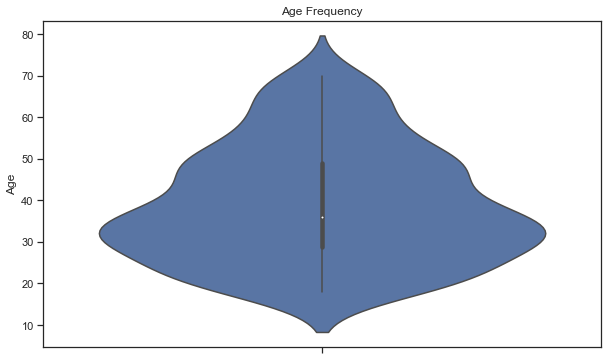

In [42]:
#Visualizing - most customers are early 30s

df.drop(['CustomerID'], axis=1, inplace=True)

plt.figure(figsize=(10,6))
plt.title('Age Frequency')
sns.axes_style('dark')
sns.violinplot(y=df['Age'])
plt.show()

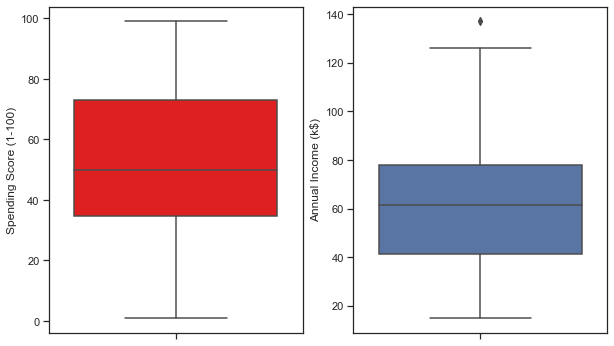

In [43]:
#Spending score vs. annual income 

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['Spending Score (1-100)'], color='red')
plt.subplot(1,2,2)
sns.boxplot(y=df['Annual Income (k$)'])
plt.show()

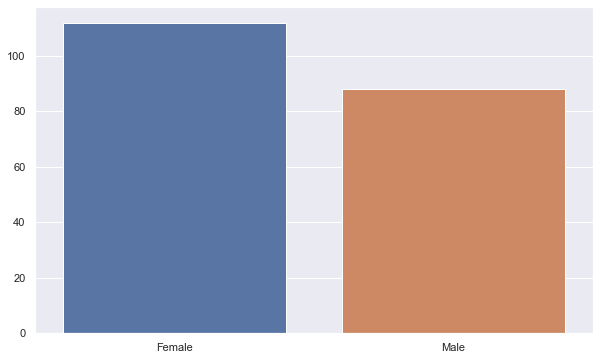

In [44]:
#Gender distribution
genders = df.Genre.value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

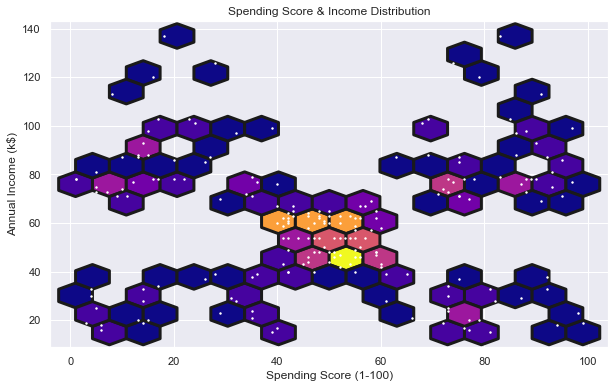

In [45]:
#Spending score and income
plt.figure(figsize=(10,6))
x = df['Spending Score (1-100)']
y = df['Annual Income (k$)']
plt.title('Spending Score & Income Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.hexbin(x, y, gridsize=15, mincnt= 1, edgecolors= 'k', cmap= 'plasma', linewidths=3)
plt.scatter(x, y, s=2, c='white')
plt.show()

In [46]:
#Inserting a new column go group by age range for more visualizaiton

def categorise(row): 
    if row['Age'] < 25:
        return '25 and under'
    elif row['Age'] >= 25 and row['Age'] <=35:
        return '25-35'
    elif row['Age'] >= 36 and row['Age'] <= 45:
        return '36-45'
    elif row['Age'] >= 46 and row['Age'] <= 55:
        return '46-55'
    elif row['Age'] >= 56:
        return '56+'



In [47]:
df['Age_Groups'] = df.apply(lambda row: categorise(row), axis=1)
print(df)

      Genre  Age  Annual Income (k$)  Spending Score (1-100)    Age_Groups
0      Male   19                  15                      39  25 and under
1      Male   21                  15                      81  25 and under
2    Female   20                  16                       6  25 and under
3    Female   23                  16                      77  25 and under
4    Female   31                  17                      40         25-35
..      ...  ...                 ...                     ...           ...
195  Female   35                 120                      79         25-35
196  Female   45                 126                      28         36-45
197    Male   32                 126                      74         25-35
198    Male   32                 137                      18         25-35
199    Male   30                 137                      83         25-35

[200 rows x 5 columns]


c:\Users\rymer\anaconda3\envs\VS_Code\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


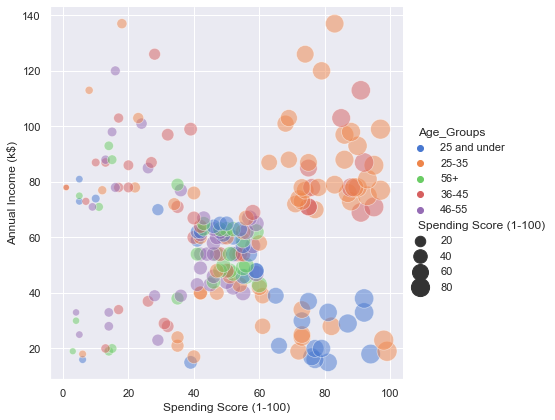

In [48]:
#Spending score and income by age group
x = df['Spending Score (1-100)']
y = df['Annual Income (k$)']
sns.relplot(x, y, hue='Age_Groups', size='Spending Score (1-100)', sizes=(40, 400), alpha= .5, palette='muted', height=6, data=df)

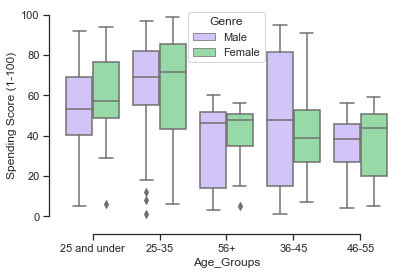

In [49]:
#Gender, age group, & spending score
sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(x='Age_Groups', y='Spending Score (1-100)', hue='Genre', palette=['m','g'], data=df)
sns.despine(offset=10, trim=True)

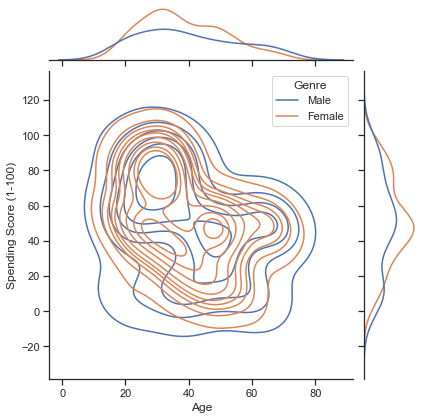

In [50]:
#Another view - using base age due to numeric requirement
sns.set_theme(style='ticks')
g = sns.jointplot(data=df, x='Age', y='Spending Score (1-100)', hue='Genre', kind='kde')

In [51]:
#Building the model
from sklearn.model_selection import train_test_split

In [52]:
#Need a numeric version of age groups col
def categorise(row): 
    if row['Age_Groups'] == '25 and under':
        return 1
    elif row['Age_Groups'] == '25-35':
        return 2
    elif row['Age_Groups'] == '36-45':
        return 3
    elif row['Age_Groups'] == '46-55':
        return 4
    elif row['Age_Groups'] == '56+':
        return 5


In [54]:
df['Age_Groups_N'] = df.apply(lambda row: categorise(row), axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_Groups,Age_Groups_N
0,Male,19,15,39,25 and under,1
1,Male,21,15,81,25 and under,1
2,Female,20,16,6,25 and under,1
3,Female,23,16,77,25 and under,1
4,Female,31,17,40,25-35,2


In [55]:
#Securing our y variable, then dropping columns that will be unused for tests
y = df['Age_Groups_N']

In [56]:
df.drop(['Age_Groups_N'], axis=1, inplace=True)

In [57]:
df.drop(['Genre'], axis=1, inplace=True)

In [58]:
df.drop(['Age'], axis=1, inplace=True)

In [60]:
df.drop(['Age_Groups'], axis=1, inplace=True)

In [61]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [62]:
X = df

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn = KNeighborsClassifier(n_neighbors=1)

In [66]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [67]:
pred = knn.predict(X_test)

In [68]:
pred

array([1, 4, 2, 4, 5, 2, 5, 4, 2, 4, 3, 5, 5, 2, 3, 3, 1, 4, 5, 1, 5, 2,
       3, 5, 1, 2, 5, 3, 2, 2, 5, 2, 1, 5, 1, 5, 3, 4, 3, 3, 2, 3, 1, 4,
       3, 3, 3, 2, 1, 1, 1, 2, 4, 3, 1, 3, 4, 3, 1, 2], dtype=int64)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
#Pretty bad, let's improve it
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[6 3 1 0 1]
 [5 6 8 1 0]
 [0 1 2 3 4]
 [0 3 3 2 5]
 [1 0 1 3 1]]
              precision    recall  f1-score   support

           1       0.50      0.55      0.52        11
           2       0.46      0.30      0.36        20
           3       0.13      0.20      0.16        10
           4       0.22      0.15      0.18        13
           5       0.09      0.17      0.12         6

    accuracy                           0.28        60
   macro avg       0.28      0.27      0.27        60
weighted avg       0.32      0.28      0.29        60



In [71]:
#Identifying accuracy ranges
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

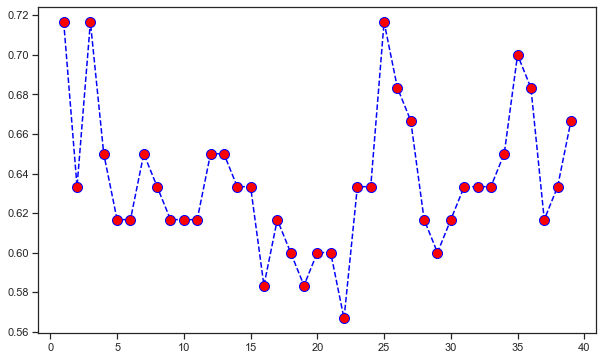

In [72]:
#22 looks like a winner
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)

In [73]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [74]:
#Groups 1 and five likely suffered due to constituting a lot of sample variance, much more than the others
#In the future, it's an easy fix - just make the age groupings even in terms of distribution
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[ 6  1  0  1  3]
 [ 4 10  4  1  1]
 [ 2  3  3  1  1]
 [ 1  0  3  5  4]
 [ 3  0  0  1  2]]


              precision    recall  f1-score   support

           1       0.38      0.55      0.44        11
           2       0.71      0.50      0.59        20
           3       0.30      0.30      0.30        10
           4       0.56      0.38      0.45        13
           5       0.18      0.33      0.24         6

    accuracy                           0.43        60
   macro avg       0.43      0.41      0.40        60
weighted avg       0.50      0.43      0.45        60

